In [74]:
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras

In [37]:
tf.__version__
keras.__version__

'2.2.4-tf'

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [42]:
X_train_full.shape

(60000, 28, 28)

In [43]:
X_train_full.dtype

dtype('uint8')

In [45]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/ 255.0

In [55]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [57]:
class_names = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

In [58]:
class_names[y_train[0]]

'Coat'

In [59]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [64]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.7511 - accuracy: 0.7582 - val_loss: 0.5611 - val_accuracy: 0.7996
Epoch 2/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4914 - accuracy: 0.8305 - val_loss: 0.4562 - val_accuracy: 0.8484
Epoch 3/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4442 - accuracy: 0.8457 - val_loss: 0.4461 - val_accuracy: 0.8534
Epoch 4/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4160 - accuracy: 0.8551 - val_loss: 0.4096 - val_accuracy: 0.8606
Epoch 5/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3967 - accuracy: 0.8615 - val_loss: 0.3907 - val_accuracy: 0.8666
Epoch 6/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3795 - accuracy: 0.8665 - val_loss: 0.3884 - val_accuracy: 0.8614
Epoch 7/30
55000/55000 [==============================] -

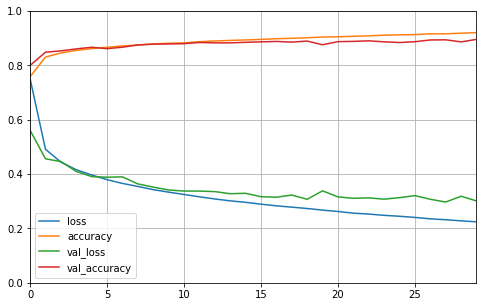

In [69]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [70]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[64.95853919682503, 0.8469]

In [72]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid,y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential(
                                [keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test= model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [ ]:
# Deep and wide net
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])